In [1]:
%matplotlib notebook

Import all the necessary packages below

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from ipywidgets import *
import ipywidgets as widgets

np.set_printoptions(precision=2)

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
p371_df = pd.read_csv("P-371_probe_data.csv", sep=",", header=0, parse_dates=True,
                      index_col=0, na_values="None", date_parser=dateparse)
p371_df.head()

,azm [Ave RZ],m0 [S1 (100 mm)],m1 [S2 (200 mm)],m2 [S3 (305 mm)],m3 [S4 (400 mm)],m4 [S5 (600 mm)],m5 [S6 (800 mm)],t0 [T1 (100 mm)],t1 [T2 (200 mm)],t2 [T3 (305 mm)],t3 [T4 (400 mm)],t4 [T5 (600 mm)],t5 [T6 (800 mm)]
datatime,,,,,,,,,,,,,
2017-08-01 00:00:00,64.43,84.71,84.52,49.2,39.29,-6.89,74.65,9.5,9.67,9.5,9.17,8.83,8.83
2017-08-01 00:30:00,64.44,84.64,84.52,49.2,39.39,-6.89,74.76,9.5,9.67,9.5,9.17,8.83,8.83
2017-08-01 01:00:00,64.43,84.58,84.47,49.31,39.39,-6.79,74.76,9.33,9.67,9.5,9.17,8.83,8.83
2017-08-01 01:30:00,64.49,84.58,84.47,49.41,39.49,-5.5,74.65,9.33,9.67,9.5,9.17,8.83,8.83
2017-08-01 02:00:00,64.42,84.51,84.47,49.41,39.29,-5.29,74.65,9.33,9.67,9.5,9.17,8.83,8.83


In [4]:
p371_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16478 entries, 2017-08-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 13 columns):
 azm [Ave RZ]        16478 non-null object
 m0 [S1 (100 mm)]    16478 non-null object
 m1 [S2 (200 mm)]    16478 non-null object
 m2 [S3 (305 mm)]    16478 non-null object
 m3 [S4 (400 mm)]    16478 non-null object
 m4 [S5 (600 mm)]    16478 non-null object
 m5 [S6 (800 mm)]    16478 non-null object
 t0 [T1 (100 mm)]    16478 non-null object
 t1 [T2 (200 mm)]    16478 non-null object
 t2 [T3 (305 mm)]    16478 non-null object
 t3 [T4 (400 mm)]    16478 non-null object
 t4 [T5 (600 mm)]    16478 non-null object
 t5 [T6 (800 mm)]    16478 non-null object
dtypes: object(13)
memory usage: 1.8+ MB


There are some rows for which the `"azm"` entries contain `"None"`.  
These data-points are not usable, and thus we remove these rows containing `"None"` for `"azm"` below as follows.

Notice that in order to remove the junk rows we use the `df.drop` function.

In [5]:
print(p371_df[p371_df.iloc[:, 0].str.contains("None")].index)
p371_df = p371_df.drop(p371_df[p371_df.iloc[:, 0].str.contains("None")].index)

DatetimeIndex(['2017-09-02 19:00:00', '2017-09-22 19:30:00',
               '2017-10-24 07:00:00', '2017-11-16 10:15:00',
               '2018-03-01 19:45:00', '2018-04-28 07:15:00',
               '2018-06-08 19:30:00'],
              dtype='datetime64[ns]', name='datatime', freq=None)


In [6]:
p371_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16471 entries, 2017-08-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 13 columns):
 azm [Ave RZ]        16471 non-null object
 m0 [S1 (100 mm)]    16471 non-null object
 m1 [S2 (200 mm)]    16471 non-null object
 m2 [S3 (305 mm)]    16471 non-null object
 m3 [S4 (400 mm)]    16471 non-null object
 m4 [S5 (600 mm)]    16471 non-null object
 m5 [S6 (800 mm)]    16471 non-null object
 t0 [T1 (100 mm)]    16471 non-null object
 t1 [T2 (200 mm)]    16471 non-null object
 t2 [T3 (305 mm)]    16471 non-null object
 t3 [T4 (400 mm)]    16471 non-null object
 t4 [T5 (600 mm)]    16471 non-null object
 t5 [T6 (800 mm)]    16471 non-null object
dtypes: object(13)
memory usage: 1.8+ MB


Looking at the output above, it appears that there were only `16478 - 16471 = 7` entries for which the `"azm"` feature contains `"None"`.

In [7]:
p371_df.describe()

,azm [Ave RZ],m0 [S1 (100 mm)],m1 [S2 (200 mm)],m2 [S3 (305 mm)],m3 [S4 (400 mm)],m4 [S5 (600 mm)],m5 [S6 (800 mm)],t0 [T1 (100 mm)],t1 [T2 (200 mm)],t2 [T3 (305 mm)],t3 [T4 (400 mm)],t4 [T5 (600 mm)],t5 [T6 (800 mm)]
count,16471,16471,16471,16471,16471,16471,16471,16471,16471,16471,16471,16471,16471
unique,4247,927,919,703,671,876,861,90,75,67,62,58,55
top,87.55,92.46,83.39,54.27,84.78,12.81,75.3,16.33,16.67,16.67,16.67,16.33,9.17
freq,17,69,111,116,218,175,186,409,486,550,710,781,778


For now, we are only interested in timestamp and the `"azm"` readings.  As such, we extract them by using the `pd.concat` function.

Notice that in the cell below, we do the following:
1. Calculate the timelapse between two consecutive `"azm"` readings.  We specifically call this column `"timelapse"`.
2. At this point, the first row of the `"timelapse"` column contains `NaT`.  We use the `df.fillna(method="bfill", inplace=True)` function to replace the first Null entry of `"timelapse"` with the value found the in the second row.
3. At this point, the `"timelapse"` column contains `timedelta` objects.  In the `"lapsed_minutes"` column, we convert the `"timelapse"` values to floating-point values which are in units of minutes.

In [8]:
df = pd.concat([p371_df.iloc[:, 0]], axis=1, copy=True)
df.columns = ["azm"]
df.index.rename("datetime", inplace=True)
df["datetime_col"] = df.index

df["timelapse"] = df["datetime_col"] - df["datetime_col"].shift()
df.drop(labels="datetime_col", axis=1, inplace=True)
df["timelapse"].fillna(method="bfill", inplace=True)
# print(df["timelapse"][2].components)
df["lapsed_minutes"] = df["timelapse"].apply(lambda x: float(x.components[0]*1440 + 60*x.components[1] + x.components[2]))
print(max(df["lapsed_minutes"]))
df.head()

8610.0


,azm,timelapse,lapsed_minutes
datetime,,,
2017-08-01 00:00:00,64.43,00:30:00,30.0
2017-08-01 00:30:00,64.44,00:30:00,30.0
2017-08-01 01:00:00,64.43,00:30:00,30.0
2017-08-01 01:30:00,64.49,00:30:00,30.0
2017-08-01 02:00:00,64.42,00:30:00,30.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16471 entries, 2017-08-01 00:00:00 to 2018-08-01 00:00:00
Data columns (total 3 columns):
azm               16471 non-null object
timelapse         16471 non-null timedelta64[ns]
lapsed_minutes    16471 non-null float64
dtypes: float64(1), object(1), timedelta64[ns](1)
memory usage: 514.7+ KB


In the following code in the cell below, we do the following:

1. Convert the string entries of the `"azm"` column to float values.
2. Remove any rows from our dataset that contain negative entries for the `"azm"` column.  Such values are faulty; an electronic probe cannot give negative readings for root-zone moisture.  From initial inspection of the csv files alone, there appears to be no negative entries for `"azm"`.  Therefore this step might be superfluous, but is done for extra insurance to make sure we are not dealing with junk data.

In [10]:
df["azm"] = df["azm"].astype(np.float64)
df = df.drop(df[df.iloc[:, 0] <= 0].index)
df["delta_azm"] = df["azm"] - df["azm"].shift(periods=1)
df["delta_azm"].fillna(method="bfill", inplace=True)
cols = df.columns.tolist()
perm = [1, 2, 0, 3]
new_cols = []
for p in perm:
    new_cols.append(cols[p])
df = df[new_cols]
df.head()

,timelapse,lapsed_minutes,azm,delta_azm
datetime,,,,
2017-08-01 00:00:00,00:30:00,30.0,64.43,0.01
2017-08-01 00:30:00,00:30:00,30.0,64.44,0.01
2017-08-01 01:00:00,00:30:00,30.0,64.43,-0.01
2017-08-01 01:30:00,00:30:00,30.0,64.49,0.06
2017-08-01 02:00:00,00:30:00,30.0,64.42,-0.07


In [11]:
df.describe()

,timelapse,lapsed_minutes,azm,delta_azm
count,16471,16471.000000,16471.000000,16471.000000
mean,0 days 00:31:54.747131,31.912452,81.072451,0.001198
std,0 days 01:41:14.635211,101.243920,10.726085,1.138665
min,0 days 00:30:00,30.000000,53.890000,-12.500000
25%,0 days 00:30:00,30.000000,71.780000,-0.110000
50%,0 days 00:30:00,30.000000,82.760000,-0.040000
75%,0 days 00:30:00,30.000000,89.100000,-0.010000
max,5 days 23:30:00,8610.000000,120.330000,27.980000


<IPython.core.display.Javascript object>


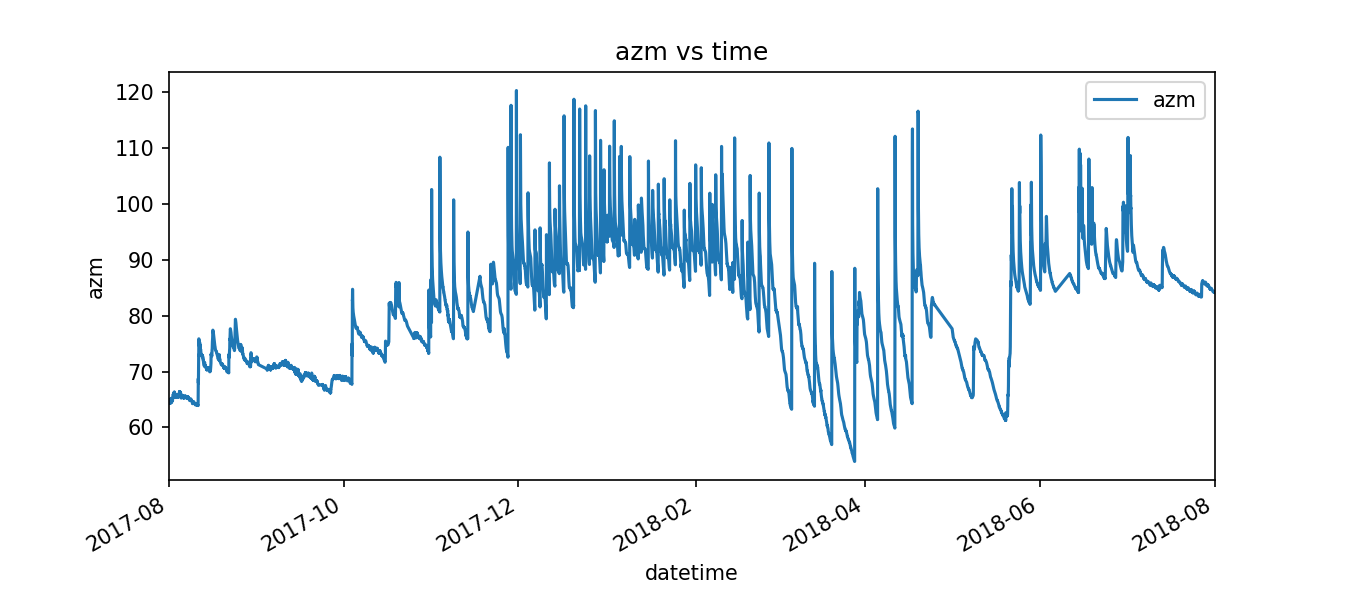

<IPython.core.display.Javascript object>


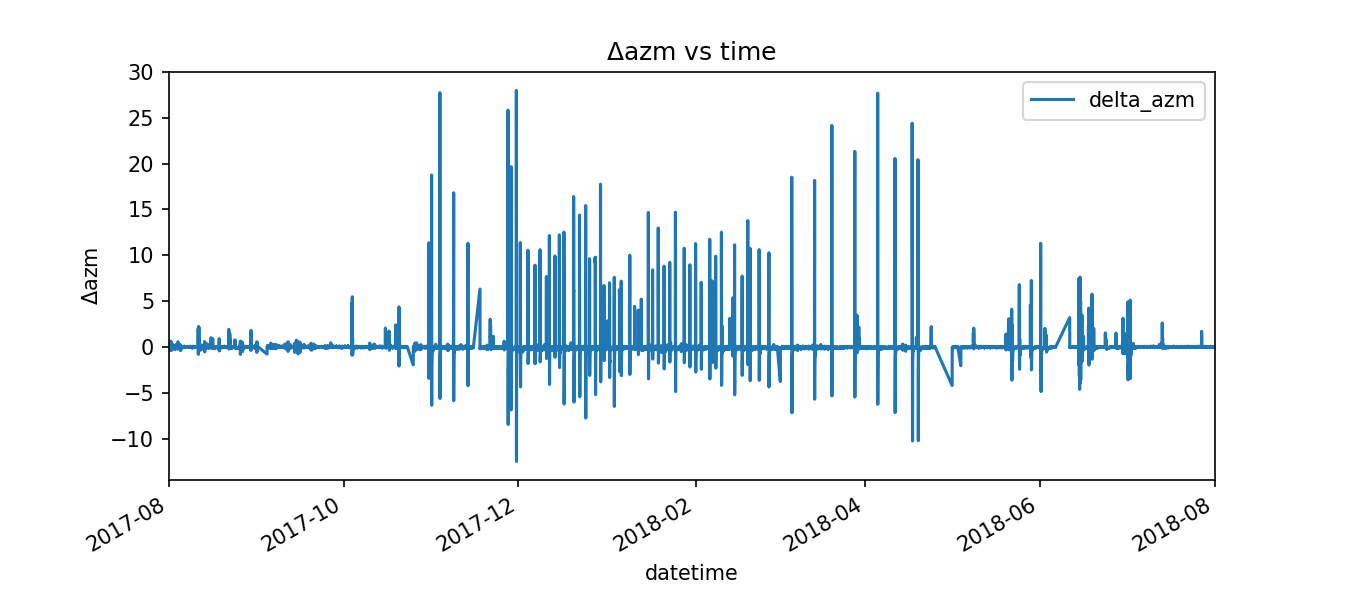

In [15]:
ax1 = df.plot(y=["azm"], kind="line", figsize=(9,4), use_index=True, title="azm vs time")
ax1.set_ylabel("azm")
ax1.set_xlabel("datetime")

ax2 = df.plot(y=["delta_azm"], kind="line", figsize=(9,4), use_index=True, title="$\Delta$azm vs time")
ax2.set_ylabel("$\Delta$azm")
ax2.set_xlabel("datetime")
plt.show()

Some comments:

1.  If delta_azm > 0, then azm(t+1) - azm(t) > 0, i.e. azm(t+1) > azm(t).  Therefore in the time interval \[t, t+1\] irrigation and/or rain has occurred.  The dates for which delta_azm > 0 are not useful in our calculation for $k_{c,p}$.
2.  Conversely, if delta_azm < 0, then typically the plant has taken up fluids from the soil without the disturbance of irrigation and/or rain.  Not all days for which delta_azm < 0 are necessarily valid dates for which we can calculate new values of $k_{c,p}$, due to water drainage and "luxurious water uptake".  This complicates our endeavour in finding valid dates for which we can calculate $k_{c,p}$.

# Let's try to smooth the data from 30-min intervals to 6-hour intervals

Currently, we have probe readings that are separated 30 minutes apart.  As a result, the line graph of `azm` versus `timestamp` is rather noisy, and it complicates our task in finding valid dates for which we can calculate new values of $k_{c,p}$.

In this section we will see if smoothing our time-series data has any benefit for us.  In particular, we are going to investigate the line graph of `"azm"` versus `"time"` for which consecutive time entries are 6 hours apart.  Other graphs of interest include, for example, `"delta_azm"` versus `"time"`.

Take notice that within a time interval of 6 hours we have 12 readings that are spaced 30 minutes apart.  Therefore, my educated guess tells me that we will be able to perform a smoothing procedure of high quality.

In [13]:
df["azm_smoothed"] = df["azm"].rolling(window="6h").mean()  # 6 hours
df["delta_azm_smoothed"] = df["delta_azm"].rolling(window="6h").mean()
df.head()

,timelapse,lapsed_minutes,azm,delta_azm,azm_smoothed,delta_azm_smoothed
datetime,,,,,,
2017-08-01 00:00:00,00:30:00,30.0,64.43,0.01,64.430000,1.000000e-02
2017-08-01 00:30:00,00:30:00,30.0,64.44,0.01,64.435000,1.000000e-02
2017-08-01 01:00:00,00:30:00,30.0,64.43,-0.01,64.433333,3.333333e-03
2017-08-01 01:30:00,00:30:00,30.0,64.49,0.06,64.447500,1.750000e-02
2017-08-01 02:00:00,00:30:00,30.0,64.42,-0.07,64.442000,-2.842171e-15


<IPython.core.display.Javascript object>


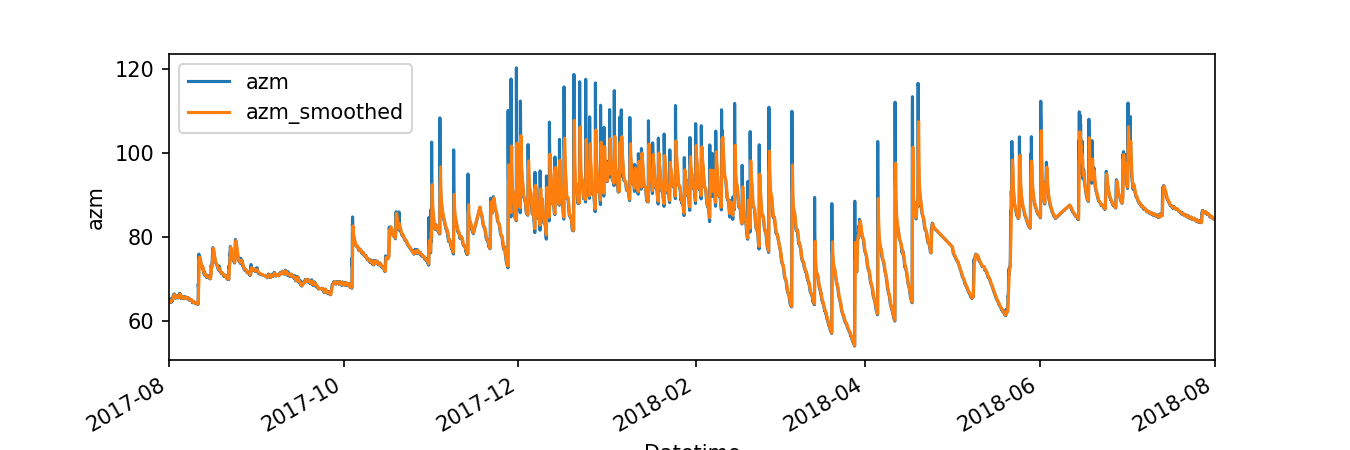

<IPython.core.display.Javascript object>


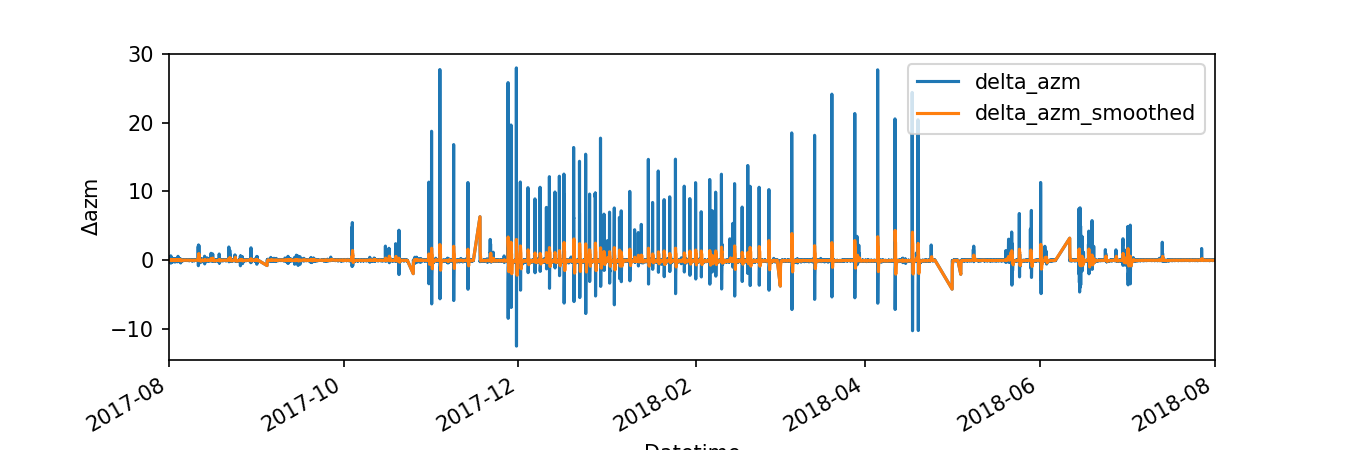

In [14]:
ax1 = df.plot(use_index=True, kind="line", y=["azm", "azm_smoothed"], figsize=(9, 3))
ax1.set_xlabel("Datetime")
ax1.set_ylabel("azm")

ax2 = df.plot(use_index=True, kind="line", y=["delta_azm", "delta_azm_smoothed"], figsize=(9, 3))
ax2.set_xlabel("Datetime")
ax2.set_ylabel("$\Delta$azm")

plt.show()